Q1. Generate points with the model y = ax+b+ where epsilon is standard gaussian. x is distributed as uniform rv between [0,10]. Train a linear regression model with following polynomials • 2
• 5
• 10
Study the out of sample performance for each of the above. Compare this when training dataset size is changed.


In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  



Text(0, 0.5, 'Y= aX+b+epsilon')

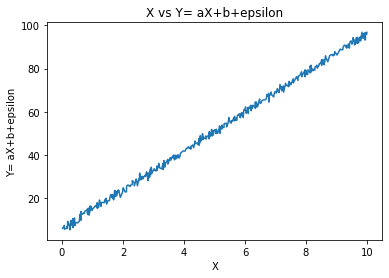

In [2]:

a= 10*np.random.rand()
b= 10*np.random.rand()
epsilon = np.random.normal(0,1,500)
x = np.random.uniform(0,10,500)

y =  a*x + b + epsilon
# line from seaborn
sns.lineplot(x,y)
plt.title('X vs Y= aX+b+epsilon')
plt.xlabel('X')
plt.ylabel('Y= aX+b+epsilon')


In [7]:

class LinearRegression:
    def Hypothesis(self,x,W):
        '''
        Function to calculate the Hypothesis ie h(x) = W0 + W1*x1 + W2*x2 + ... + Wn*xn
        x: input data
        W: parameters
        return: Hypothesis
        '''
        return np.dot(x,W.T)

    def Cost(self,x,y,W):
        '''
        Function to calculate the cost function
        x: input data
        y: output data
        W: parameters
        return: cost function
        '''
        m = len(x) # number of training examples
        J = (1/(2*m))*np.sum((self.Hypothesis(x,W)-y)**2)
        return J
        
    ## Define gradient descent for linear regression
    def GradientDescent(self,x, y, W, learn_rate, epochs):
        '''
        Function to calculate the gradient descent
        x: input data
        y: output data
        W: parameters
        learn_rate: learning rate
        epochs: number of iterations
        return: parameters
        '''
        m = len(x)
        J_all=[]
        epochs1=[]
        for i in range(epochs):
            W = W - (learn_rate/m)*(x.T)@(self.Hypothesis(x,W)-y)
            J_all.append(self.Cost(x,y,W))
            epochs1.append(i)
        plt.plot(epochs1,J_all)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        return W


    ## Creating dataset
    def GenerateData(self,degree,x):
        '''
        Function to create the dataset
        degree: degree of the polynomial
        x: input data
        return: dataset
        '''
        return [x**i for i in range(degree+1)]



In [8]:
LR = LinearRegression()

In [9]:

degree =2
X_data = LR.GenerateData(degree,x)
X_data = np.array(X_data).T
Y_data = y
W = 10*abs((np.random.randn(degree+1))) # random initialization of parameters



0.03857017776129607


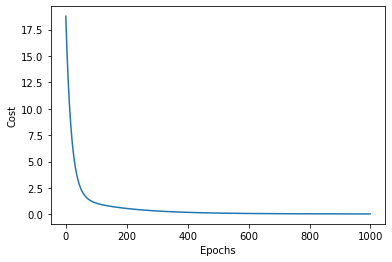

In [10]:

## Normalizing X_data and Y_data
X_data = (X_data-np.mean(X_data))/np.std(X_data)
Y_data = (Y_data - np.mean(Y_data))/np.std(Y_data)
train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=0.2)
W_new = LR.GradientDescent(train_x,train_y,W,0.01,1000) # learning rate = 0.01, epochs = 1000
total_loss = LR.Cost(test_x,test_y,W_new)
print(total_loss)



In [11]:

def createGraph(degree,x,y):
    # create the data points
    X_data = LR.GenerateData(degree,x)
    X_data = np.array(X_data).T
    
    # create the y data
    Y_data = y
    W = 10*abs((np.random.randn(degree+1))) # random initialization of parameters

    # normalize the data
    X_data = (X_data-np.mean(X_data))/np.std(X_data)
    Y_data = (Y_data - np.mean(Y_data))/np.std(Y_data)
    
    # split the data into train and test
    train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=0.2)
    # get the optimal W
    W_new = LR.GradientDescent(train_x,train_y,W,0.01,1000) # learning rate = 0.01, epochs = 1000
    # get the total loss
    total_loss = LR.Cost(test_x,test_y,W_new)
    plt.title("Degree: "+str(degree))
    
    print("Total loss for degree "+str(degree)+" is "+str(total_loss))

   


Total loss for degree 2 is 0.03086202247855766


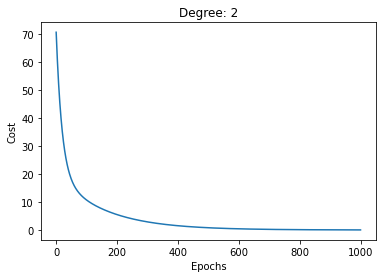

In [12]:
createGraph(2,x,y)


Total loss for degree 5 is 0.4977684830072907


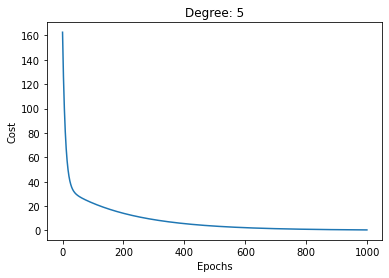

In [13]:

createGraph(5,x,y)


Total loss for degree 10 is 7.39485097300237


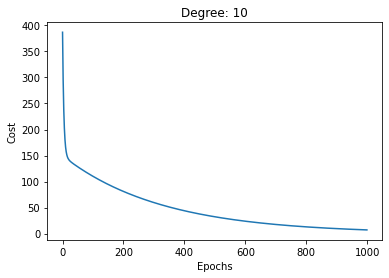

In [14]:

createGraph(10,x,y)


Total loss for degree 2 is 0.011747842896476623
Total loss for degree 5 is 0.5374684385104506
Total loss for degree 10 is 3.0863473433315027


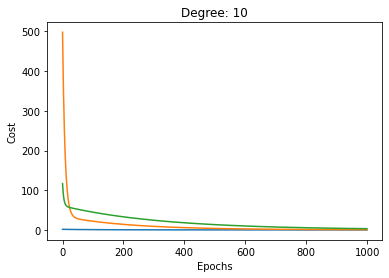

In [15]:

degrees =[2,5,10]
for degree in degrees:
    createGraph(degree,x,y)
    


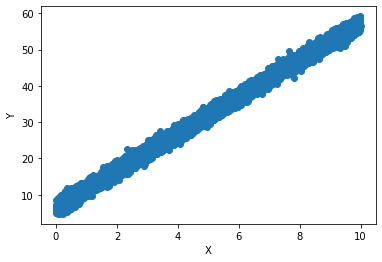

In [16]:
# For a dataset with 20 times the previous size, plot the out of sample performance for each of the above. Compare this when training dataset size is changed.

a= 10*np.random.rand()
b= 10*np.random.rand()
epsilon = np.random.normal(0,1,10000)

x = np.random.uniform(0,10,10000)
y =  a*x + b + epsilon
plt.plot(x,y,'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Total loss for degree 2 is 0.1464320176603957


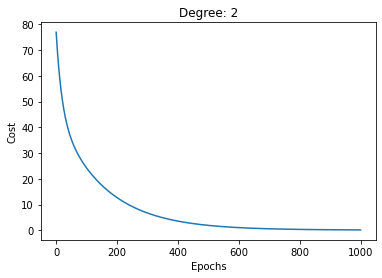

In [17]:

createGraph(2,x,y)


Total loss for degree 5 is 0.4748596472894362


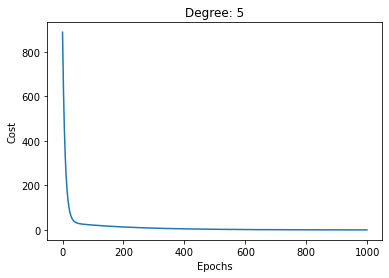

In [18]:

createGraph(5,x,y)


Total loss for degree 10 is 2.9033516496340828


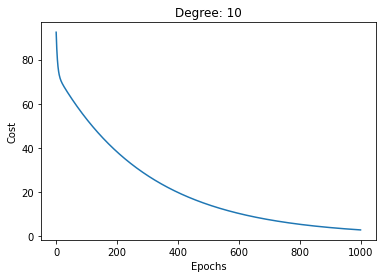

In [19]:

createGraph(10,x,y)
